In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-raymond ca
roald no
busselton au
mnogovershinnyy ru
rikitea pf
rikitea pf
huangmei cn
sao gabriel da cachoeira br
punta arenas cl
acapulco mx
cuddapah in
yamethin mm
hobart au
elizabethton us
cape town za
yellowknife ca
sao filipe cv
nuuk gl
yellowknife ca
hit iq
busselton au
sept-iles ca
victoria sc
albany au
mataura pf
talcahuano cl
tsihombe mg
georgetown sh
bure et
opuwo na
la argentina co
khani ru
taolanaro mg
coquimbo cl
ati td
taolanaro mg
barawe so
cape town za
punta arenas cl
krasnoselkup ru
ortakoy tr
cape town za
golden ca
rikitea pf
puerto ayora ec
tasiilaq gl
pevek ru
saleaula ws
taolanaro mg
bolungarvik is
mataura pf
mataura pf
saint-pierre pm
jamestown sh
busselton au
grand river south east mu
manacor es
aswan eg
pisco pe
mahebourg mu
gat ly
vardo no
vaini to
lima us
norman wells ca
vaini to
new norfolk au
husavik is
chapais ca
husavik is
cape town za
hithadhoo mv
taolanaro mg
zhuhai cn
punta arenas cl
bluff nz
kapaa us
albany au
punta arenas cl
kapaa us
sosua do
ba

kavieng pg
kavaratti in
barrow us
ushuaia ar
opuwo na
camacha pt
kodiak us
punta arenas cl
bathsheba bb
babanusah sd
sobolevo ru
shima cn
punta arenas cl
pagman af
cayenne gf
san patricio mx
sainte-martine ca
dagda lv
saryshagan kz
caramay ph
ushuaia ar
fortuna us
saint-philippe re
amderma ru
hobart au
ilulissat gl
busselton au
fevralsk ru
puerto ayora ec
sao filipe cv
jamestown sh
puerto ayora ec
castro cl
hasaki jp
sao joao da barra br
saint-philippe re
mys shmidta ru
rikitea pf
pemberton ca
kangaatsiaq gl
beian cn
ponta do sol cv
laguna br
port keats au
santa lucia es
jumla np
san angelo us
college us
dzhusaly kz
doctor pedro p. pena py
narsaq gl
bintulu my
isangel vu
thompson ca
arraial do cabo br
hilo us
lagoa pt
busselton au
bluff nz
bayangol ru
faanui pf
taolanaro mg
cherskiy ru
kismayo so
khatanga ru
port alfred za
zeya ru
hermanus za
atuona pf
san patricio mx
aklavik ca
punta arenas cl
ushuaia ar
vestmannaeyjar is
padang id
khomutovo ru
hobart au
cape town za
kaitangata nz
bar

albany au
yellowknife ca
kahului us
nizhneyansk ru
atuona pf
tasiilaq gl
taolanaro mg
tasiilaq gl
kavaratti in
antofagasta cl
vaini to
norman wells ca
chokurdakh ru
vaini to
rikitea pf
bowen au
khandyga ru
chapais ca
avarua ck
amarante do maranhao br
ngukurr au
avarua ck
barentsburg sj
qaanaaq gl
east london za
asau tv


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    city_data.append(city_url)

In [12]:
print(city_data)


['http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=saint-raymond', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=roald', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=busselton', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=mnogovershinnyy', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=rikitea', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=huangmei', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=sao gabriel da cachoeira', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=punta arenas', 'http://api.openweathermap.org/data/2.5/weather?un

In [13]:
#counter=0
city_list=[]
counter=0
for city_url in city_data:
    if(counter==1):
        city_weather = requests.get(city_url.replace(" ","+")).json()
        print(city_weather)
    try:
        city_weather = requests.get(city_url.replace(" ","+")).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_list.append({"City": city_weather["name"],
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("bad city")
        pass
    counter=counter+1
 #   city_list.append(requests.get(city.replace(' ','+')))
   # print(f"processing record {counter +1} of set {counter} | {city.replace(' ','+')}")
   # counter +=1
#       try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url.replace(' ','+')).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

#     # Indicate that Data Loading is complete.
#     print("-----------------------------")
       # print("Data Retrieval Complete      ")
#     print("-----------------------------")
    
    

{'coord': {'lon': 6.1333, 'lat': 62.5833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 46.6, 'feels_like': 34.63, 'temp_min': 44.01, 'temp_max': 48.2, 'pressure': 998, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 200}, 'rain': {'1h': 0.56}, 'clouds': {'all': 75}, 'dt': 1616940895, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1616908166, 'sunset': 1616955080}, 'timezone': 7200, 'id': 3141667, 'name': 'Roald', 'cod': 200}
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_list)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Raymond,45.4670,-73.6095,45.00,81,100,4.61,CA,2021-03-28 14:14:55
1,Roald,62.5833,6.1333,48.20,57,75,14.97,NO,2021-03-28 14:14:55
2,Busselton,-33.6500,115.3333,59.00,83,0,8.46,AU,2021-03-28 14:14:55
3,Mnogovershinnyy,53.9353,139.9242,16.99,91,50,1.12,RU,2021-03-28 14:14:55
4,Rikitea,-23.1203,-134.9692,78.06,75,8,16.08,PF,2021-03-28 14:14:56
5,Huangmei,30.1924,116.0250,63.88,74,0,2.04,CN,2021-03-28 14:14:56
6,São Gabriel da Cachoeira,-0.1303,-67.0892,77.00,88,75,4.61,BR,2021-03-28 14:14:56
7,Punta Arenas,-53.1500,-70.9167,48.20,53,0,27.63,CL,2021-03-28 14:14:56
8,Acapulco de Juárez,16.8634,-99.8901,71.60,64,1,4.61,MX,2021-03-28 14:11:16
9,Kadapa,14.4667,78.8167,89.08,30,72,8.75,IN,2021-03-28 14:14:57


In [15]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 0
set_count = 1

# Loop through all the cities in our list.
for i, item in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        print(i)
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[record_count]
    set_count += 1
    record_count += 1
        
 # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {item}")
    # Add 1 to the record count.
#record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 2 | saint-raymond
Processing Record 2 of Set 3 | roald
Processing Record 3 of Set 4 | busselton
Processing Record 4 of Set 5 | mnogovershinnyy
Processing Record 5 of Set 6 | rikitea
Processing Record 6 of Set 7 | huangmei
Processing Record 7 of Set 8 | sao gabriel da cachoeira
Processing Record 8 of Set 9 | punta arenas
Processing Record 9 of Set 10 | acapulco
Processing Record 10 of Set 11 | cuddapah
Processing Record 11 of Set 12 | yamethin
Processing Record 12 of Set 13 | hobart
Processing Record 13 of Set 14 | elizabethton
Processing Record 14 of Set 15 | cape town
Processing Record 15 of Set 16 | yellowknife
Processing Record 16 of Set 17 | sao filipe
Processing Record 17 of Set 18 | nuuk
Processing Record 18 of Set 19 | hit
Processing Record 19 of Set 20 | sept-iles
Processing Record 20 of Set 21 | victoria
Processing Record 21 of Set 22 | albany
Processing Record 22 of Set 23 | mataura
Process

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

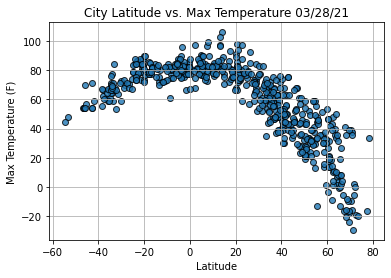

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

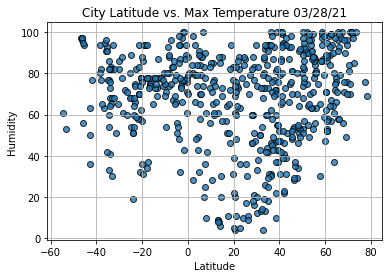

In [20]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

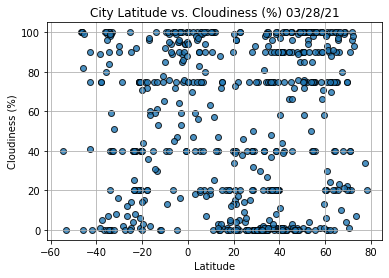

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

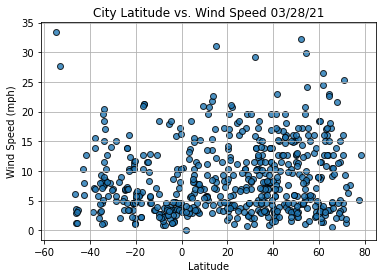

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

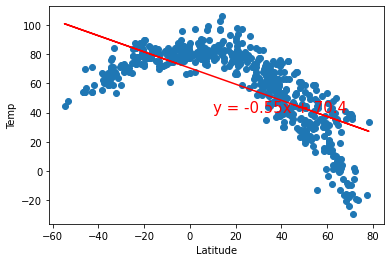

In [23]:
# Import linregress
from scipy.stats import linregress

# Perform linear regression.
x_values=lats
y_values=max_temps
y_label="Temp"
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()

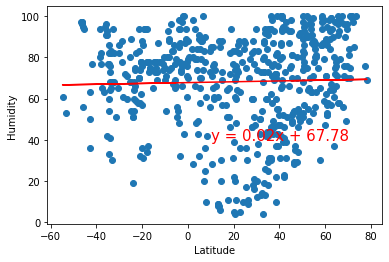

In [24]:
# Perform linear regression.
x_values=lats
y_values=humidity

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

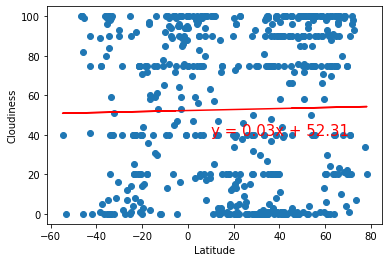

In [25]:
# Perform linear regression.
x_values=lats
y_values=cloudiness

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

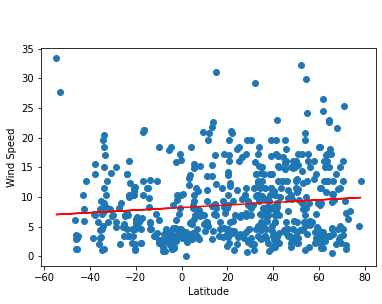

In [26]:
# Perform linear regression.
x_values=lats
y_values=wind_speed

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Lat                      -33.9258
Lng                       18.4232
Max Temp                       77
Humidity                       41
Cloudiness                      0
Wind Speed                   11.5
Country                        ZA
Date          2021-03-28 14:14:57
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
565     True
566    False
567    False
568     True
569    False
Name: Lat, Length: 570, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Raymond,45.4670,-73.6095,45.00,81,100,4.61,CA,2021-03-28 14:14:55
1,Roald,62.5833,6.1333,48.20,57,75,14.97,NO,2021-03-28 14:14:55
3,Mnogovershinnyy,53.9353,139.9242,16.99,91,50,1.12,RU,2021-03-28 14:14:55
5,Huangmei,30.1924,116.0250,63.88,74,0,2.04,CN,2021-03-28 14:14:56
8,Acapulco de Juárez,16.8634,-99.8901,71.60,64,1,4.61,MX,2021-03-28 14:11:16


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [36]:
def plot_linear_regression(x,y,x_label,y_label,tuple):
    # Perform linear regression.

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

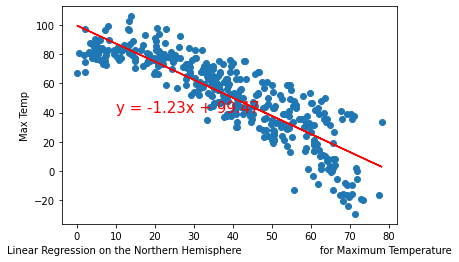

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

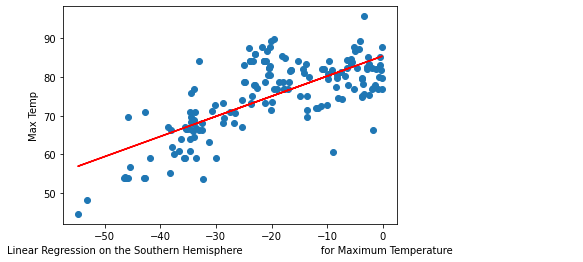

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

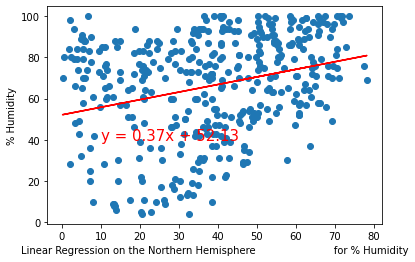

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

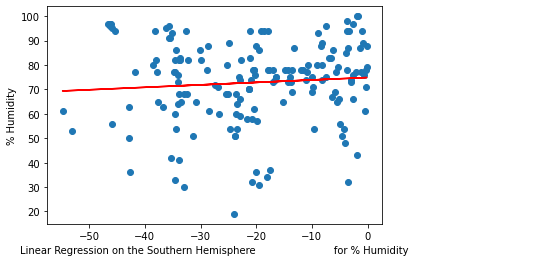

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))